### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта
## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 8


### Дисциплина: Методы машинного обучения
##### Студент:  Маслова Анастасия
##### Группа:   НКНбд-01-21
## Москва 2024
***
### Вариант 4

1. Набор данных stl10 с изменением разрешения до 72x72

2. Классы с метками 1,3,5,7,9

3. Требования к архитектуре сети CNN:

    Последовательный API с методом add() при создании

    Функция потерь: категориальная кросс-энтропия

    Кол-во сверточных слоев 5

    Количество фильтров в сверточных слоях 8

    Размеры фильтра 5х5

    Использование слоев dropout

4. Требования к архитектуре сети трансформер:

Функция потерь: разреженная категориальная кросс-энтропия

6. Показатель качества многоклассовой классификации:

максимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.




Решение:


1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.  

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps
import keras
from keras import layers, models, losses, callbacks
from keras import ops

import json
import re
import string
from IPython.display import display, HTML

In [104]:
ds = tfds.load("stl10", split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])
df_train = tfds.as_dataframe(ds[0])
df_test = tfds.as_dataframe(ds[1])
df_val = tfds.as_dataframe(ds[2])
df_train.head(3)

,image,label
0,"[[[136, 144, 153], [125, 127, 136], [125, 126,...",1
1,"[[[70, 132, 186], [81, 139, 189], [143, 176, 2...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",8


In [105]:
df_train.shape, df_test.shape, df_val.shape

((4000, 2), (500, 2), (500, 2))

2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте по одному изображению из каждого класса, подписывая изображение меткой класса.


Классы с метками 1,3,5,7,9

In [106]:
x = df_train[df_train['label'] == 1]
y = df_train[df_train['label'] == 3]
z = df_train[df_train['label'] == 5]
a = df_train[df_train['label'] == 7]
b = df_train[df_train['label'] == 9]
x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4

df_tr1 = pd.concat([x, y, z, a, b])
Y_tr1 = df_tr1['label']
df_tr1 = df_tr1['image']

x = df_test[df_test['label'] == 1]
y = df_test[df_test['label'] == 3]
z = df_test[df_test['label'] == 5]
a = df_test[df_test['label'] == 7]
b = df_test[df_test['label'] == 9]
x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4

df_te1 = pd.concat([x, y, z, a, b])
Y_te1 = df_te1['label']
df_te1 = df_te1['image']

x = df_val[df_val['label'] == 1]
y = df_val[df_val['label'] == 3]
z = df_val[df_val['label'] == 5]
a = df_val[df_val['label'] == 7]
b = df_val[df_val['label'] == 9]
x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4

df_val1 = pd.concat([x, y, z, a, b])
Y_val1 = df_val1['label']
df_val1 = df_val1['image']


Y_tr1.value_counts()

<ipython-input-106-6025acdadeee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['label'] = 0
<ipython-input-106-6025acdadeee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1
<ipython-input-106-6025acdadeee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

label
4    400
2    399
0    394
1    392
3    391
Name: count, dtype: int64

In [107]:
Y_tr2 = list(Y_tr1)
Y_te2 = list(Y_te1)
Y_val2 = list(Y_val1)
for i in range(len(Y_tr2)):
    tmp = [0]*5
    tmp[Y_tr2[i]] = 1
    Y_tr2[i] = tmp
for i in range(len(Y_te2)):
    tmp = [0]*5
    tmp[Y_te2[i]] = 1
    Y_te2[i] = tmp
for i in range(len(Y_val2)):
    tmp = [0]*5
    tmp[Y_val2[i]] = 1
    Y_val2[i] = tmp

In [108]:
Y_tr1 = np.array(Y_tr1)
Y_tr2 = np.array(Y_tr2)
Y_te1 = np.array(Y_te1)
Y_te2 = np.array(Y_te2)
Y_val1 = np.array(Y_val1)
Y_val2 = np.array(Y_val2)

In [109]:
df_tr1.shape

(1976,)

In [110]:
df_tr = np.zeros(shape=(df_tr1.shape[0],72,72,3), dtype=np.float32)
df_te  = np.zeros(shape=(df_te1.shape[0],72,72,3), dtype=np.float32)
df_va  = np.zeros(shape=(df_val1.shape[0],72,72,3), dtype=np.float32)

for i in range(len(df_tr1)):
    df_tr[i,:,:,:] = np.array(Image.fromarray(df_tr1.iloc[i]).resize((72,72)))
for i in range(len(df_te1)):
    df_te[i,:,:,:] = np.array(Image.fromarray(df_te1.iloc[i]).resize((72,72)))
for i in range(len(df_val1)):
    df_va[i,:,:,:] = np.array(Image.fromarray(df_val1.iloc[i]).resize((72,72)))

df_tr /= 255
df_te  /= 255
df_va /= 255

In [111]:
def plot_image(df, i):
    img = df['image'][i]
    plt.figure(figsize=(6, 6))
    plt.imshow(img);
    plt.title(df['label'][i])
    plt.show()

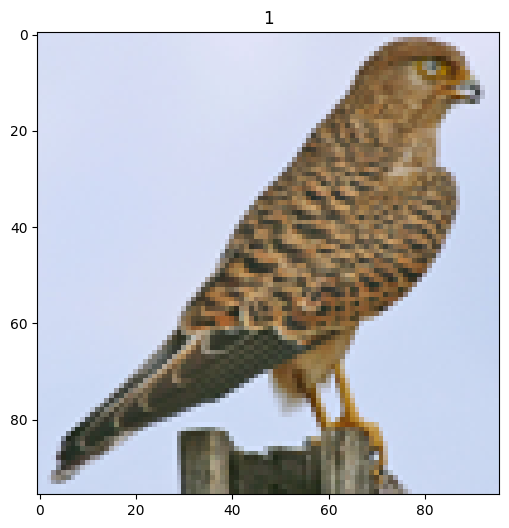

In [112]:
plot_image(df_train, 50)

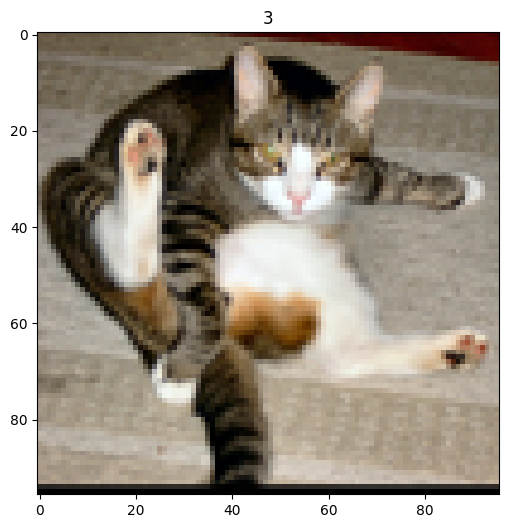

In [113]:
plot_image(df_train, 3)

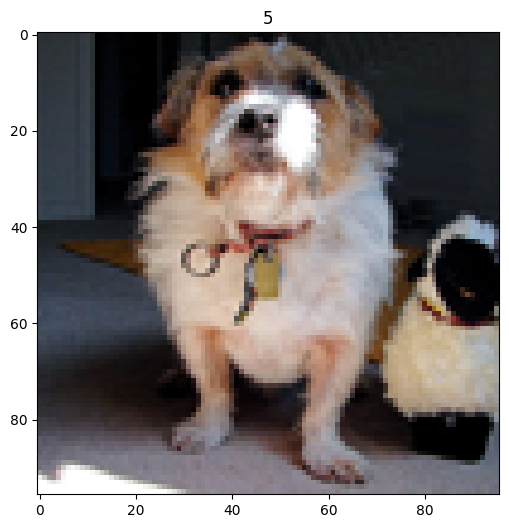

In [114]:
plot_image(df_train, 19)

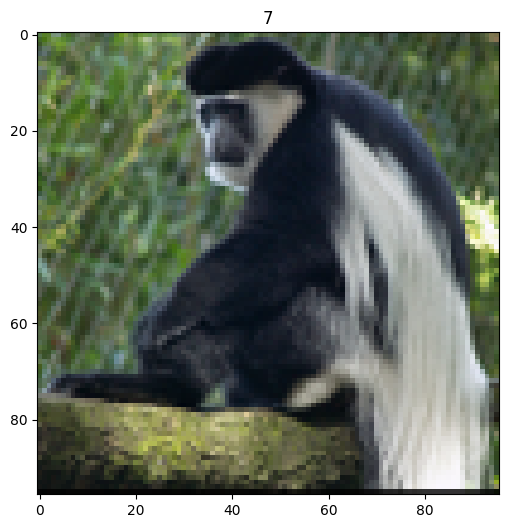

In [115]:
plot_image(df_train, 17)

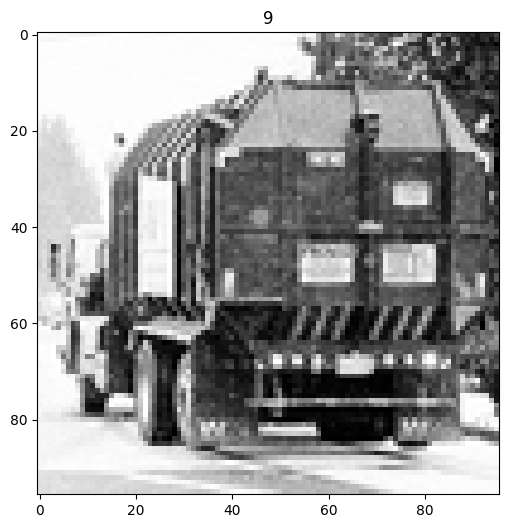

In [116]:
plot_image(df_train, 3969)

3. Постройте нейронные сети различных архитектур (MLP, CNN, RNN, трансформер) для задачи многоклассовой классификации изображений (архитектуры и требования к сетям указаны в индивидуальном задании), используя функции потерь, указанные в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте переобучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд.  

Требования к архитектуре сети CNN:

Последовательный API с методом add() при создании

Функция потерь: категориальная кросс-энтропия

Кол-во сверточных слоев 5

Количество фильтров в сверточных слоях 8

Размеры фильтра 5х5

Использование слоев dropout

In [117]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.regularizers import l1_l2

In [118]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.Input(shape=(72, 72, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='selu', kernel_regularizer='l2', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='selu', kernel_regularizer='l2', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='selu', kernel_regularizer='l2', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='selu', kernel_regularizer='l2', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='selu', kernel_regularizer='l2', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(5, activation='softmax'))

In [119]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [120]:
history1 = cnn.fit(df_tr,
                  Y_tr2,
                  epochs=50,
                  validation_data=(df_va, Y_val2),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
                  batch_size=16
                  )

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.2289 - loss: 1.9898 - val_accuracy: 0.2230 - val_loss: 1.9918
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.3259 - loss: 1.7757 - val_accuracy: 0.3420 - val_loss: 1.6846
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.3854 - loss: 1.6209 - val_accuracy: 0.4126 - val_loss: 1.5471
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.4092 - loss: 1.5401 - val_accuracy: 0.3532 - val_loss: 1.6176
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4337 - loss: 1.5090 - val_accuracy: 0.4015 - val_loss: 1.4833
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.4618 - loss: 1.4408 - val_accuracy: 0.4015 - val_loss: 1.4878
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.4660 - loss: 1.4316 - val_accuracy: 0.4349 - val_loss: 1.4449
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.4871 - loss: 1.

Требования к архитектуре сети трансформер:

Функция потерь: разреженная категориальная кросс-энтропия

In [121]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier
num_classes = 10
input_shape = (72, 72, 3)

In [122]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.Normalization(),
        tf.keras.layers.Resizing(image_size, image_size),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(factor=0.02),
        tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(df_tr)

In [123]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [124]:
class Patches( tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


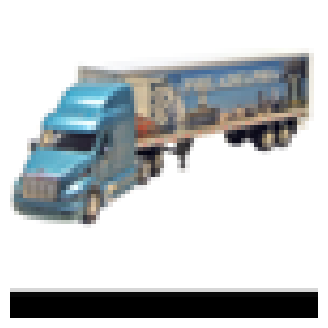

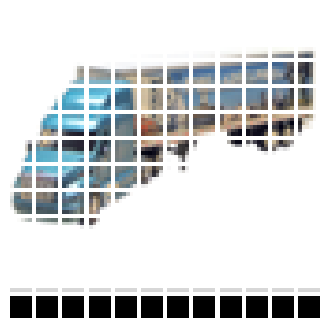

In [125]:
plt.figure(figsize=(4, 4))
image = df_tr[np.random.choice(range(df_tr.shape[0]))]
plt.imshow(image)
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img))
    plt.axis("off")

In [126]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


In [127]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


In [128]:
ViT = create_vit_classifier()

In [129]:
optimizer = keras.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)

ViT.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

In [130]:
checkpoint_filepath = "/content/drive/MyDrive/ViT_checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

In [131]:
history = ViT.fit(
    x=df_tr,
    y=Y_tr1,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 188s 21s/step - accuracy: 0.1859 - loss: 5.7531 - top-5-accuracy: 0.8014 - val_accuracy: 0.6667 - val_loss: 0.9583 - val_top-5-accuracy: 1.0000
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 182s 18s/step - accuracy: 0.2566 - loss: 2.7459 - top-5-accuracy: 0.9992 - val_accuracy: 0.6313 - val_loss: 1.2391 - val_top-5-accuracy: 0.9899
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 131s 19s/step - accuracy: 0.2831 - loss: 1.7437 - top-5-accuracy: 0.9954 - val_accuracy: 0.5354 - val_loss: 1.4206 - val_top-5-accuracy: 0.9646
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 139s 18s/step - accuracy: 0.3420 - loss: 1.5706 - top-5-accuracy: 0.9952 - val_accuracy: 0.6061 - val_loss: 1.2118 - val_top-5-accuracy: 1.0000
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 20s/step - accuracy: 0.3435 - loss: 1.5725 - top-5-accuracy: 0.9985 - val_accuracy: 0.6717 - val_loss: 1.0980 - val_top-5-accuracy: 1.0000
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 20s/step - accuracy: 0.3481 - loss: 1.5149 - top-5-accuracy

In [132]:
ViT.load_weights(checkpoint_filepath)

In [133]:
_, accuracy, top_5_accuracy = ViT.evaluate(df_te, Y_te1)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.4287 - loss: 1.3495 - top-5-accuracy: 1.0000
Test accuracy: 42.75%


4. Вычислите и выведите в отчете матрицы ошибок нейронных сетей (tf.math.confusion_matrix) для обучающей и тестовой выборок.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


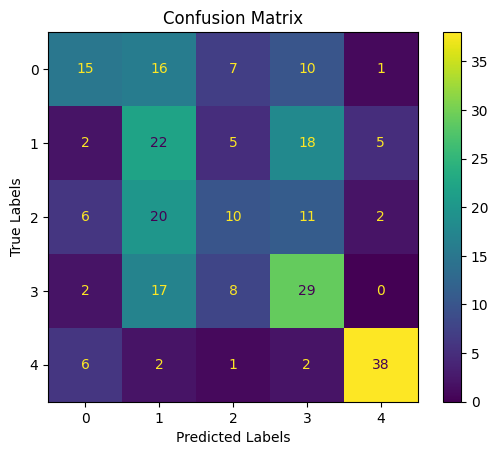

In [176]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cnn.predict(df_te)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(Y_te2, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(5))
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 678ms/step


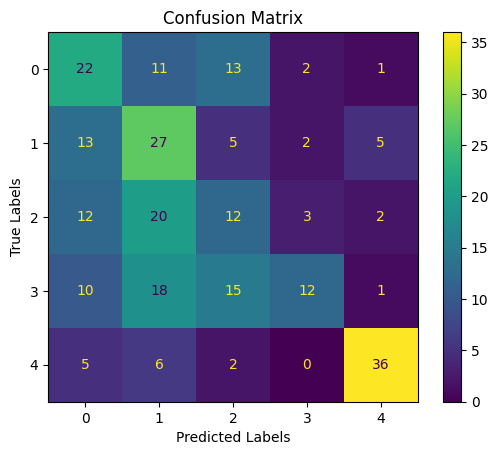

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = ViT.predict(df_te)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(Y_te2, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(5))
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

5. Визуализируйте кривые обучения построенных моделей для показателей потерь на обучающей и валидационной выборках на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

Transformer

In [140]:
losses = history.history['loss']
loss0 = history.history['loss'][0]

relative_losses = [loss / loss0 for loss in losses]

In [141]:
val_losses = history.history['val_loss']
val_loss0 = history.history['val_loss'][0]
relative_val_losses = [val_loss /val_loss0 for val_loss in val_losses]

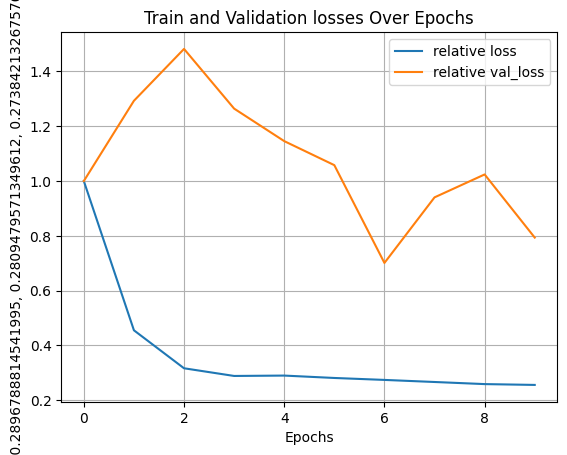

In [142]:
plt.plot(relative_losses, label='relative loss')
plt.plot(relative_val_losses, label="relative val_loss")
plt.xlabel("Epochs")
plt.ylabel(relative_losses)
plt.title("Train and Validation losses Over Epochs")
plt.legend()
plt.grid()
plt.show()

CNN

In [143]:
losses = history1.history['loss']
loss0 = history1.history['loss'][0]

relative_losses = [loss / loss0 for loss in losses]

In [144]:
val_losses = history1.history['val_loss']
val_loss0 = history1.history['val_loss'][0]
relative_val_losses = [val_loss /val_loss0 for val_loss in val_losses]

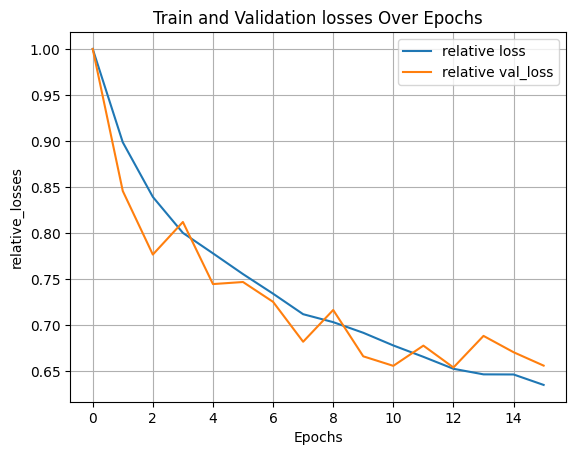

In [145]:
plt.plot(relative_losses, label='relative loss')
plt.plot(relative_val_losses, label="relative val_loss")
plt.xlabel("Epochs")
plt.ylabel("relative_losses")
plt.title("Train and Validation losses Over Epochs")
plt.legend()
plt.grid()
plt.show()

6. Оцените качество многоклассовой классификации нейронными сетями на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите название нейронной сети с лучшим качеством.  

Показатель качества многоклассовой классификации:
максимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.

In [146]:
X1 = cnn.predict(df_te)
X2 = ViT.predict(df_te)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [147]:
for i in range(len(X1)):
    for j in range(len(X1[i])):
        if X1[i][j] == min(X1[i]):
            X1[i][j] = 1
        else:
            X1[i][j] = 0
for i in range(len(X2)):
    for j in range(len(X2[i])):
        if X2[i][j] == min(X2[i]):
            X2[i][j] = 1
        else:
            X2[i][j] = 0

In [148]:
X11 = np.array(X1, dtype=np.int32)
X22 = np.array(X2, dtype=np.int32)

In [167]:
X22_re = np.resize(X22, (255, 5))

In [168]:
m1 = tf.keras.metrics.Recall()
m2 = tf.keras.metrics.Recall()

m1.update_state(X11, Y_te2)
m2.update_state(X22_re, Y_te2)

In [169]:
m1.result().numpy(), m2.result().numpy()

(0.2, 0.221843)